In [1]:
import numpy as np
import matplotlib.pyplot as plt
from eigsep_corr import io

%matplotlib widget

In [2]:
dt = np.dtype(np.int32).newbyteorder(">")
freq = np.linspace(0, 250, num=1024, endpoint=False)

In [3]:
f1 = 250 / 2048 * 1100  # delta function
f2 = 250 / 2048 * 1101  # split

print(f1, f2)

134.27734375 134.3994140625


In [ ]:
off = np.frombuffer(np.load("offline.npz")["0"], dtype=dt).astype(float)
delta = np.frombuffer(np.load("delta_func2.npz")["0"], dtype=dt).astype(float)  # 134.2773 MHz
split = np.frombuffer(np.load("split_func2.npz")["0"], dtype=dt).astype(float)  # 134.3994  MHz

In [ ]:
plt.figure()
plt.plot(freq, delta)
plt.plot(freq, split)
plt.plot(freq, off, c="k")
plt.xlim(130, 140)
plt.show()

In [ ]:
plt.figure()
plt.plot(freq, delta-off)
plt.plot(freq, split-off)
plt.xlim(130, 140)
plt.show()

In [ ]:
plt.figure()
plt.plot(freq, np.abs(delta-off))
plt.plot(freq, np.abs(split-off))
#plt.xlim(130, 140)
plt.show()

In [18]:
_, sync = io.read_file("sync.eig")
sync = sync["0"].mean(axis=1)[..., 0]

_, not_sync = io.read_file("not_sync.eig")
not_sync = not_sync["0"].mean(axis=1)[..., 0]

In [16]:
# diff_sync = np.abs(sync[:, 1] - sync[:, 0]) / 2
# diff_not_sync = np.abs(not_sync[:, 1] - not_sync[:, 0]) / 2

In [19]:
diff_sync = np.abs(sync[:len(sync)//2] - sync[len(sync)//2:]) / 2
diff_not_sync = np.abs(not_sync[:len(sync)//2] - not_sync[len(sync)//2:]) / 2

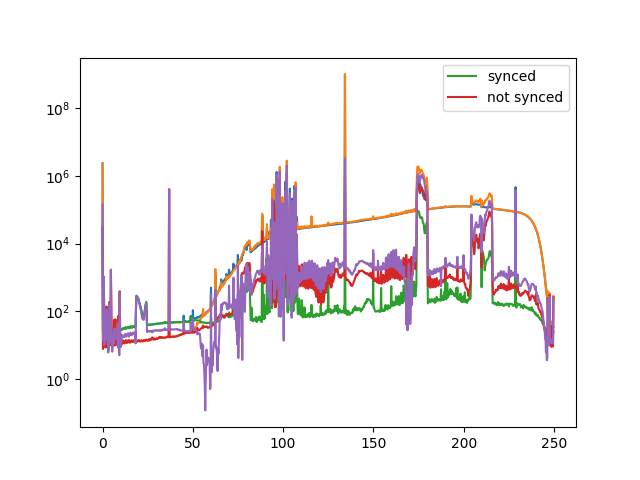

In [22]:
plt.figure()
plt.plot(freq, sync.mean(axis=(0)))
plt.plot(freq, not_sync.mean(axis=(0)))
plt.plot(freq, diff_sync.mean(axis=0), label="synced")
plt.plot(freq, diff_not_sync.mean(axis=0), label="not synced")
plt.plot(freq, np.abs(sync.mean(axis=(0)) - not_sync.mean(axis=(0))))
plt.legend()
plt.yscale("log")
plt.show()

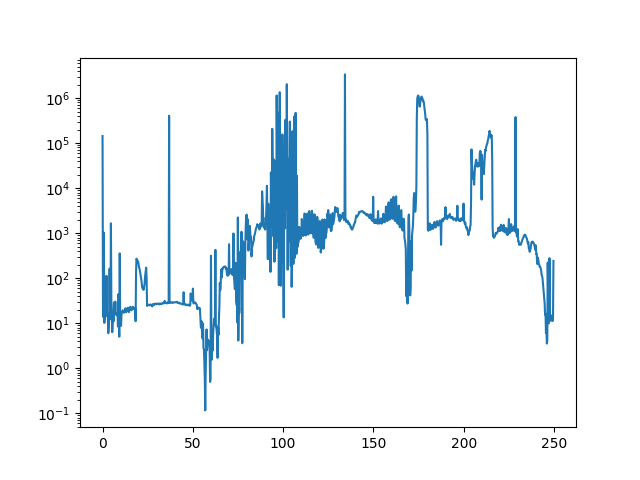

In [8]:
plt.figure()
plt.plot(freq, np.abs(sync.mean(axis=0) - not_sync.mean(axis=0)))
plt.yscale("log")
plt.show()

In [6]:
plt.figure()
plt.plot(freq, sync.mean(axis=0))
plt.plot(freq, not_sync.mean(axis=0))
plt.show()

In [ ]:
plt.figure()
plt.plot(freq, sync.mean(axis=0))
plt.plot(freq, not_sync.mean(axis=0))
plt.show()